In [2]:
import numpy as np
from models import SGD
import datasets.read as data
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")
X[:5,:]

/home/klimek/sem8_v2/aml/aml_projects/Project1/datasets/read.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace('Osmancik', 0)


array([[1.52310000e+04, 5.25578979e+02, 2.29749878e+02, 8.50937881e+01,
        9.28882003e-01, 1.56170000e+04, 5.72895527e-01],
       [1.46560000e+04, 4.94311005e+02, 2.06020065e+02, 9.17309723e+01,
        8.95404994e-01, 1.50720000e+04, 6.15436316e-01],
       [1.46340000e+04, 5.01122009e+02, 2.14106781e+02, 8.77682877e+01,
        9.12118077e-01, 1.49540000e+04, 6.93258822e-01],
       [1.31760000e+04, 4.58342987e+02, 1.93337387e+02, 8.74483948e+01,
        8.91860902e-01, 1.33680000e+04, 6.40669048e-01],
       [1.46880000e+04, 5.07166992e+02, 2.11743378e+02, 8.93124542e+01,
        9.06690896e-01, 1.52620000e+04, 6.46023929e-01]])

In [5]:
df = pd.DataFrame(X)
df.corr()

,0,1,2,3,4,5,6
0,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
1,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
2,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
3,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
4,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
5,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
6,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


In [11]:
X = X[:, [0, 3, 4, 6]]
df = pd.DataFrame(X)
df.corr()

,0,1,2,3
0,1.000000,0.787840,0.352095,-0.061184
1,0.787840,1.000000,-0.291683,0.063366
2,0.352095,-0.291683,1.000000,-0.198580
3,-0.061184,0.063366,-0.198580,1.000000


## SGD test

In [21]:
m = SGD(iter_limit=500, rate=1E-5)
m.fit(X, y, interactions=[(2,3)])
m.get_params()['coefficients']

Debug: 0.3315026777146888
Debug: 0.33096557209412625
Debug: 0.3760195720601893
Debug: 0.31618979340386133
Debug: 0.3205918603008495
Debug: 0.47325114649430056
Debug: 0.3078919611058666
Debug: 0.45118426509122145
Debug: 0.3086423752620142
Debug: 0.2910417330311468
Debug: 0.2902030452554989
Debug: 0.2787881665554153
Debug: 0.5045489763174302
Debug: 0.27409650266523755
Debug: 0.2768021936097256
Debug: 0.3253867069592644
Debug: 0.2643714831637496
Debug: 0.26591724371056813
Debug: 0.2565989328978304
Debug: 0.24994591461054938
Debug: 0.5257258306532151
Debug: 0.2487991615843299
Debug: 0.24636384766731823
Debug: 0.25000390482779267
Debug: 0.25196578408625214
Debug: 0.3815754625883123
Debug: 0.2437612488913743
Debug: 0.2373004167746302
Debug: 0.234583161280284
Debug: 0.23124415980613833
Debug: 0.22878246878558173
Debug: 0.22633911592771483
Debug: 0.23205171603061103
Debug: 0.23123870448000616
Debug: 0.3043881783867164
Debug: 0.2604700264520403
Debug: 0.22288483166146023
Debug: 0.35489162054036

array([  -0.76322972,    0.99329087, -126.27329076,  -30.05393   ,
        -52.72684038,   -0.57014931,   50.06958583,   -0.58514438,
        -36.45403721])

<Axes: title={'center': 'Class = 1'}, ylabel='Count'>

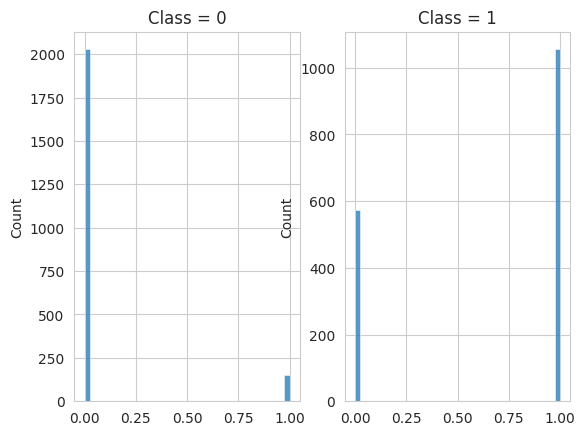

In [22]:
y0 = y==0
y1 = y==1

p0 = m.predict_proba(X[y0])
p1 = m.predict_proba(X[y1])

fig, ax = plt.subplots(1, 2)
ax[0].set_title('Class = 0')
sns.histplot(x=p0, ax=ax[0], binwidth=0.025)
ax[1].set_title('Class = 1')
sns.histplot(x=p1, ax=ax[1], binwidth=0.025)

In [23]:
y_pred = m.predict(X)
1 - np.abs(y_pred - y).mean()

0.8094488188976378

array([  -0.76322972,    0.99329087, -126.27329076,  -30.05393   ,
        -52.72684038,   -0.57014931,   50.06958583,   -0.58514438,
        -36.45403721])

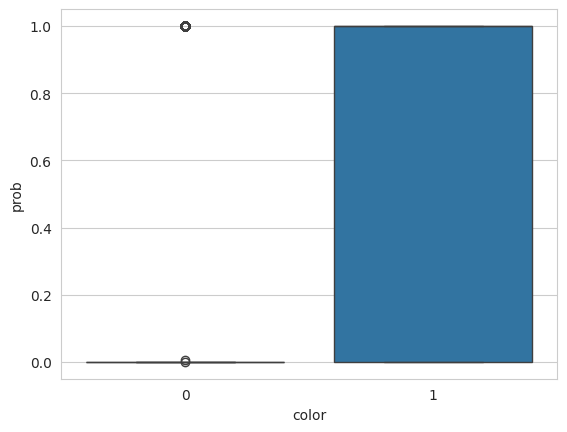

In [24]:
yyy = m.predict_proba(X)
df = pd.DataFrame.from_dict({'prob': yyy, 'color': y})
sns.boxplot(data=df, x='color', y='prob')

(yyy[y1] > 0.99).mean()
perfect_coefs = m.get_params()['coefficients']
perfect_coefs

In [10]:
np.all(m.get_params()['weights'] == np.diag(np.ones(X.shape[0])))

KeyError: 'weights'

In [ ]:
m.get_params()